<a href="https://colab.research.google.com/github/OguzBerkAydin/RentPrediction/blob/main/rentPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/evkiratahmin/housing.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].mean())


In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<ipython-input-21-f8282b195a8c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon_matrisi = data.corr()


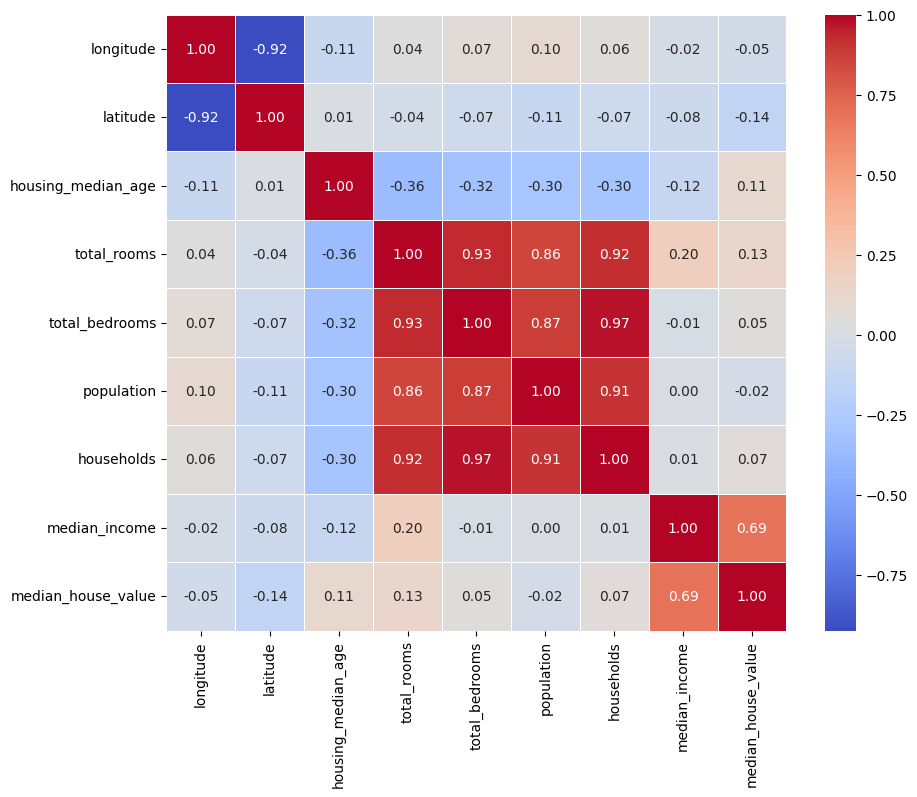

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Korelasyon matrisini oluşturalım
korelasyon_matrisi = data.corr()

# Korelasyon matrisini ısı haritası olarak çizelim
plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon_matrisi, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Grafiği gösterelim
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
for column in columns:
    data = remove_outliers(data, column)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18126 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18126 non-null  float64
 1   latitude            18126 non-null  float64
 2   housing_median_age  18126 non-null  float64
 3   total_rooms         18126 non-null  float64
 4   total_bedrooms      18126 non-null  float64
 5   population          18126 non-null  float64
 6   households          18126 non-null  float64
 7   median_income       18126 non-null  float64
 8   median_house_value  18126 non-null  float64
 9   ocean_proximity     18126 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [ ]:
data["ocean_proximity"]

0        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 18126, dtype: object

In [ ]:
encoded_data = pd.get_dummies(data, columns=["ocean_proximity"])

In [ ]:
data = encoded_data

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [ ]:
X = data.drop("median_house_value", axis = 1)
y = data["median_house_value"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor() #Regresyon proble mi olduğu için DecisionTreeClassifier kullanmadık!

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
regression_score = model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)

In [ ]:
regression_score

0.6212516020906731

In [ ]:
mae

44984.191246781906

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Çapraz Doğrulama Skorları:", cross_val_scores)

Çapraz Doğrulama Skorları: [-0.63171629  0.36269766  0.47265843 -0.30999242  0.3815521 ]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300,random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
regScore = model.score(X_test,y_test)

In [ ]:
mae

32552.195113399535

In [ ]:
regScore

0.8082130239444307

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
regScore = model.score(X_test,y_test)

In [ ]:
mae

49913.56482116217

In [ ]:
regScore

0.6465737005120398